# Deep Learning Hello World! (LeNet-5)

Objective: To be able to implement LeNet-5 for MNIST Classification

Step 1: Taking care of the imports which includes numpy, datasets, models, layers, optimizers, and utils. <br />
You will also be able to tell if your set-up is correct/complete.

In [1]:
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import model_from_json
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
import numpy as np
import time  # for duration logs

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 8]

tf.debugging.set_log_device_placement(True)

In [2]:
from IPython.display import Image     # for displaying images
from IPython.core.display import HTML 

In [3]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 14302196828042893436
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 10829170490022412328
physical_device_desc: "device: XLA_CPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 10516263732
locality {
  bus_id: 1
  links {
    link {
      device_id: 1
      type: "StreamExecutor"
      strength: 1
    }
    link {
      device_id: 2
      type: "StreamExecutor"
      strength: 1
    }
    link {
      device_id: 3
      type: "StreamExecutor"
      strength: 1
    }
  }
}
incarnation: 1458480343785930244
physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:06:00.0, compute capability: 3.7"
, name: "/device:GPU:1"
device_type: "GPU"
memory_limit: 11261381837
locality {
  bus_id: 1
  links {
    link {
      type: "StreamExecutor"
      strength: 1
    }
    link {
      device_id: 2
      type: "StreamExecutor"

Step 2: Define LeNet-5 CNN model 

In [4]:
Image(url= "https://world4jason.gitbooks.io/research-log/content/deepLearning/CNN/img/lenet.png")

In [5]:
class LeNet:
	@staticmethod
	def build(input_shape, classes):
		model = Sequential()
		# CONV => RELU => POOL
		model.add(Conv2D(20, kernel_size=5, padding="same",
			input_shape=input_shape))
		model.add(Activation("relu"))
		model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
		# CONV => RELU => POOL
		model.add(Conv2D(50, kernel_size=5, padding="same"))
		model.add(Activation("relu"))
		model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
		# Flatten => RELU layers
		model.add(Flatten())
		model.add(Dense(500))
		model.add(Activation("relu"))
 
		# a softmax classifier
		model.add(Dense(classes))
		model.add(Activation("softmax"))

		return model

Step 3: Set-up some constants to be utilized in the training/testing of the model <br\>

In [6]:
NB_EPOCH = 10 # 250
BATCH_SIZE = 128
VERBOSE = 1
OPTIMIZER = Adam()
VALIDATION_SPLIT=0.2

IMG_ROWS, IMG_COLS = 28, 28 
NB_CLASSES = 10  
INPUT_SHAPE = (1, IMG_ROWS, IMG_COLS)

np.random.seed(1983)  # for reproducibility

Step 4: Load the MNIST Dataset which are shuffled and split between train and test sets <br\>
- X_train is 60000 rows of 28x28 values
- X_test is 10000 rows of 28x28 values

First 100 train images:


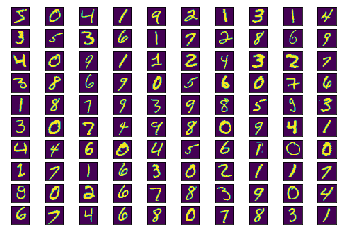

In [7]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
#K.set_image_dim_ordering()
K.set_image_data_format("channels_first")
print("First 100 train images:")
for k in range(100):
    plt.subplot(10, 10, k+1)      
    plt.gca().axes.get_yaxis().set_visible(False)
    plt.gca().axes.get_xaxis().set_visible(False)
    plt.imshow(X_train[k])

Step 5: Preprocess the input data by reshaping it, converting it to float, and normalizing it [0-1].

In [8]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255 
X_test /= 255  

# we need a 60K x [1 x 28 x 28] shape as input to the CONVNET
X_train = X_train[:, np.newaxis, :, :]
X_test = X_test[:, np.newaxis, :, :]

print(X_train.shape, 'train samples')
print(X_test.shape, 'test samples')

(60000, 1, 28, 28) train samples
(10000, 1, 28, 28) test samples


Step 6: Convert class vectors to binary class matrices; One-Hot-Encoding (OHE)

In [9]:
Y_train = to_categorical(y_train, NB_CLASSES)
Y_test = to_categorical(y_test, NB_CLASSES)

Step 7: Create the model with 3 layers: Input:784 ==> Hidden:128 w/ dropout ==> Hidden:128 w/ dropout ==> Output:10 (with Softmax activation)

In [10]:
# model = LeNet.build(input_shape=INPUT_SHAPE, classes=NB_CLASSES)
# model.summary()

Step 8: Compile the model with categorical_crossentropy loss function, Adam optimizer, and accuracy metric

In [11]:
# model.compile(loss='categorical_crossentropy',
#               optimizer=OPTIMIZER,
#               metrics=['accuracy'])

Step 9: Perform the training with 128 batch size, 250 epochs, and 20 % of the train data used for validation

## SLOW MODEL

In [12]:
# import time  # for duration logs
# start = time.time()
# history = model.fit(X_train, Y_train,
#                     batch_size=BATCH_SIZE, epochs=NB_EPOCH,
#                     verbose=VERBOSE, validation_split=VALIDATION_SPLIT)
# end = time.time()
# elapsed = end - start
# time.strftime("%H:%M:%S", time.gmtime(elapsed))

## PARALLEL MODEL (MULTI-GPU) #FAILED

In [13]:
# from tensorflow.keras.utils import multi_gpu_model
# import os
# os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
# os.environ["CUDA_VISIBLE_DEVICES"] = "0,1,2,3,4,5,6,7"

# parallel_model = multi_gpu_model(model, gpus=8)  # DID NOT TRAIN ON MULTIGPU
# parallel_model.compile(loss='categorical_crossentropy',
#               optimizer=OPTIMIZER,
#               metrics=['accuracy'])

# parallel_model.fit(X_train, Y_train,
#                     batch_size=BATCH_SIZE, epochs=NB_EPOCH,
#                     verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

## PARALLEL MODEL (SUCCESS)

In [14]:
start = time.time()
strategy = tf.distribute.MirroredStrategy(devices=["/gpu:6", "/gpu:7"]) # 00:01:13' for 10 epochs:: 7 and 8 in nvidia-smi
                                          
with strategy.scope():
    model = LeNet.build(input_shape=INPUT_SHAPE, classes=NB_CLASSES)
    model.compile(loss='categorical_crossentropy', optimizer=OPTIMIZER, metrics=['accuracy'])
    history = model.fit(X_train, Y_train,
                    batch_size=BATCH_SIZE, epochs=10,
                    verbose=VERBOSE, validation_split=VALIDATION_SPLIT)
end = time.time()
elapsed = end - start
time.strftime("%H:%M:%S", time.gmtime(elapsed))


Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:6
Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:6
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:6
Executing op Add in device /job:localhost/replica:0/task:0/device:GPU:6
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:6
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:6
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:GPU:6
Executing op Assert in device /job:localhost/replica:0/task:0/device:GPU:6
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:6
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:6
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:7
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:7
Executing op LogicalNot in device /job:localho

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:7
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:6
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:7
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:6
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:7
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:6
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:7
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:6
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:7
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:6
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:7
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:6
Executing op VarHandleOp in device /job:

'00:01:04'

Step 10: Evaluate the model on the test dataset (10,000 images)

In [15]:
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op GeneratorDataset in device /job:localhost/replica:0/task:0/device:GPU:6
Executing op GeneratorDataset in device /job:localhost/replica:0/task:0/device:GPU:7
Executing op __inference_distributed_function_17323 in device /job:localhost/replica:0/task:0/device:GPU:0
10000/1 [==========================================================================================================================================


Test score: 0.035459479167765276
Test accuracy: 0.9896


Step 11: Plot the accuracy from history

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


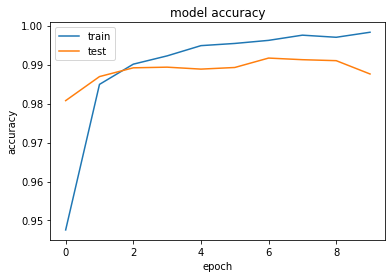

In [16]:
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Step 12: Plot the loss from history

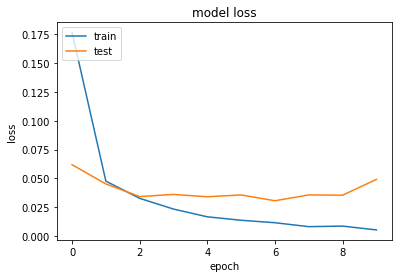

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

[Optional] Step 13: Save the model (serialized) to JSON

In [18]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
%ls

DeepLearningHelloWorldLeNet.ipynb        mnist_mlp_run.txt
DeepLearningHelloWorldMNISTMLP.ipynb     model.h5
GetAvailableGPUs.ipynb                   model.json
KerasTutorialDeepLearninginPython.ipynb  README.md
mnist_mlp.py


[Optional] Step 14: Save the model weights

In [19]:
model.save_weights("model.h5")
%ls

DeepLearningHelloWorldLeNet.ipynb        mnist_mlp_run.txt
DeepLearningHelloWorldMNISTMLP.ipynb     model.h5
GetAvailableGPUs.ipynb                   model.json
KerasTutorialDeepLearninginPython.ipynb  README.md
mnist_mlp.py


[Optional] Step 15: Load the saved model

In [20]:
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("model.h5")

Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Add in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replic

[Optional] Step 16: Compile and evaluate loaded model

In [21]:
loaded_model.compile(loss='categorical_crossentropy',
              optimizer=OPTIMIZER,
              metrics=['accuracy'])
score = loaded_model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_distributed_function_18667 in device /job:localhost/replica:0/task:0/device:GPU:0
10000/1 [==================================================================================================================================================================================================================================================================================================================================================================================================

Executing op DeleteIterator in device /job:localhost/replica:0/task:0/device:CPU:0

Test score: 0.035459479167765276
Test accuracy: 0.9896
